# Bem vindo ao notebook de análise dos dados do spotify 🤘🎶🎙️

### Importando os pacotes necessários

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Fazendo a leitura inicial dos dados

In [4]:
data = pd.read_csv('songs_normalize.csv')

data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


### Hipótese: As músicas mais dançantes são mais populares

Imaginamos, em um primeiro momento, que poderia existir uma relação entre a dançabilidade e a popularidade da música. A melhor forma de ver essa correlação, ao nosso ver, seria o mapa de calor.

<AxesSubplot:>

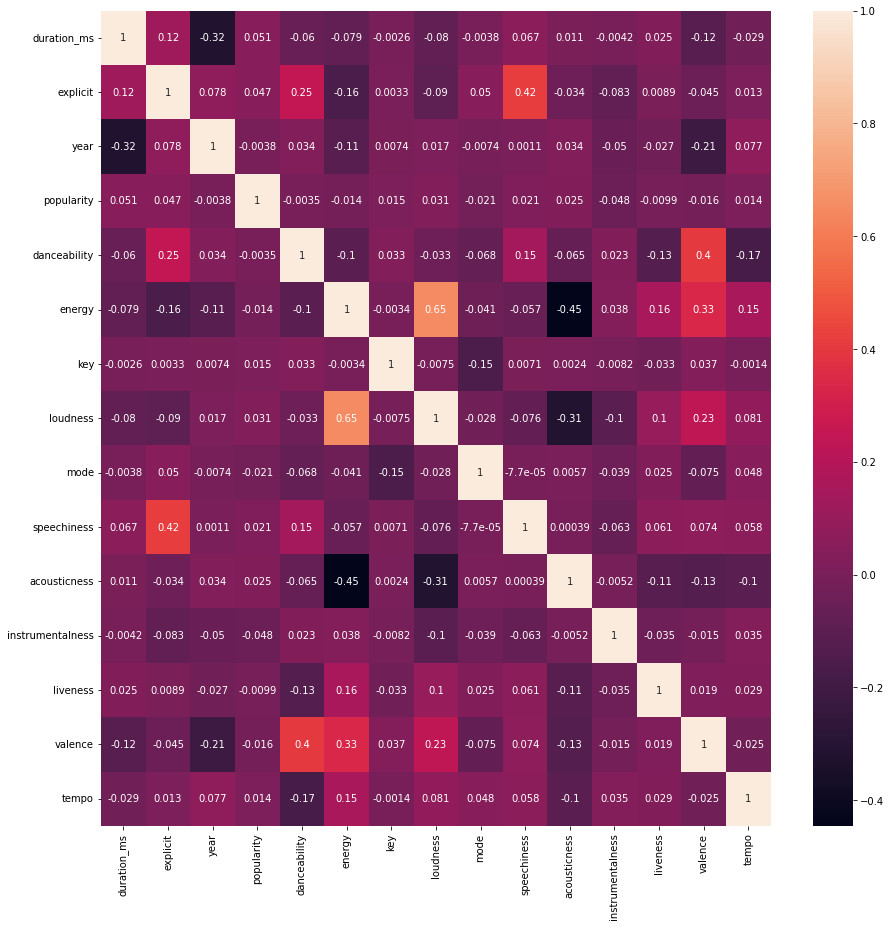

In [5]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True)

Pelo mapa de calor, observa-se que não existe uma relação entre a popularidade e qualquer uma das outras variáveis. Existe, porém, uma relação entre as músicas explícitas e que possuem voz, o que faz muito sentido, já que uma música explícita (considerada ofensiva ou inapropriada para crianças) precisa de palavras para ser categorizada dessa forma.

Também notável que existe uma relação entre a dançabilidade e a valência (categorizadas como músicas positivas, como músicas felizes, alegres, entre outros) o que também faz sentido.

A maior relação, porém, é a entre energia e o volume (em decibéis) da música. Podemos afirmar que é uma relação, de certa forma, evidente, já que a energia é medida pela intensidade e atividade da música,

### Hipótese: Os gêneros mais populares variam com o passar dos anos

A indústria da música parece cíclica, com alguns gêneros se mantendo em alta por algum tempo, porém decaindo aos poucos com outros gêneros assumindo os seus lugares. Podemos verificar se essa impressão se confirma através dos dados.

In [6]:
# Passo 1: separando os gêneros
genres = list(data.genre.str.split(", "))

# Passo 2: pegando o maior número de gêneros
max_number_of_genres = max([len(genre) for genre in genres])

max_number_of_genres

4

In [7]:
# Passo 3: definindo função
# Função para separar o gênero das músicas
# A função seleciona a tabela gênero, a transforma em um string, e faz a separação usando a vírgula como separador
# O parâmetro 'expand' faz com que o resultado da separação seja dividido em colunas
# Caso não exista um valor para a coluna, a coluna é preenchida com 'None'
# Feita a separação em 4 colunas pelo fato de o maior número de gêneros ser 4
def split_genres(df):
    df[["genre_1", "genre_2", "genre_3", "genre_4"]] = df.genre.str.split(", ",expand=True)
    return df

# Passo 4: chamando a função e salvando o resultado em um novo dataframe
data_with_splitted_genres = (data.pipe(split_genres))

# Passo 5: removendo a coluna 'genre' que não será mais utilizada
new_data = data_with_splitted_genres.drop(columns='genre')

# Visualizando as primeiras linhas do novo dataframe
new_data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre_1,genre_2,genre_3,genre_4
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,None,None,None
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,...,0.0488,0.0103,0.000000,0.6120,0.684,148.726,rock,pop,None,None
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,...,0.0290,0.1730,0.000000,0.2510,0.278,136.859,pop,country,None,None
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,...,0.0466,0.0263,0.000013,0.3470,0.544,119.992,rock,metal,None,None
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,...,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,None,None,None


In [8]:
# Passo 6: criando novos dataframes com apenas uma coluna de gênero

# Criando lista para armazenar os dataframes temporariamente
df_list = list()

for index in range(1, 5):
    new_df = new_data[['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', f'genre_{index}']]
    
    # Renomeando coluna gênero
    new_df = new_df.rename(columns={f'genre_{index}': 'genre'})
    
    # Removendo valores nulos
    new_df = new_df[new_df['genre'].notnull()]
    
    # Adicionando os dataframes na lista
    df_list.append(new_df)

# Unindo os dataframes
# O atributo ignore_index deve ser utilizado para o novo dataframe concatenado não ficar com o index quebrado
united_df = pd.concat(df_list, ignore_index=True)

# Descartando dados duplicados
united_df.drop_duplicates(keep='first')

# Visualizando o novo dataframe
united_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,rock
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,pop
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,rock
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [9]:
# Passo 7: verificando o número de gêneros
len(united_df['genre'].unique())

15

Como o número de gêneros era muito grande, decidimos fazer um recorte, pegando os gêneros com mais de 100 ocorrências.

<AxesSubplot:xlabel='year', ylabel='popularity'>

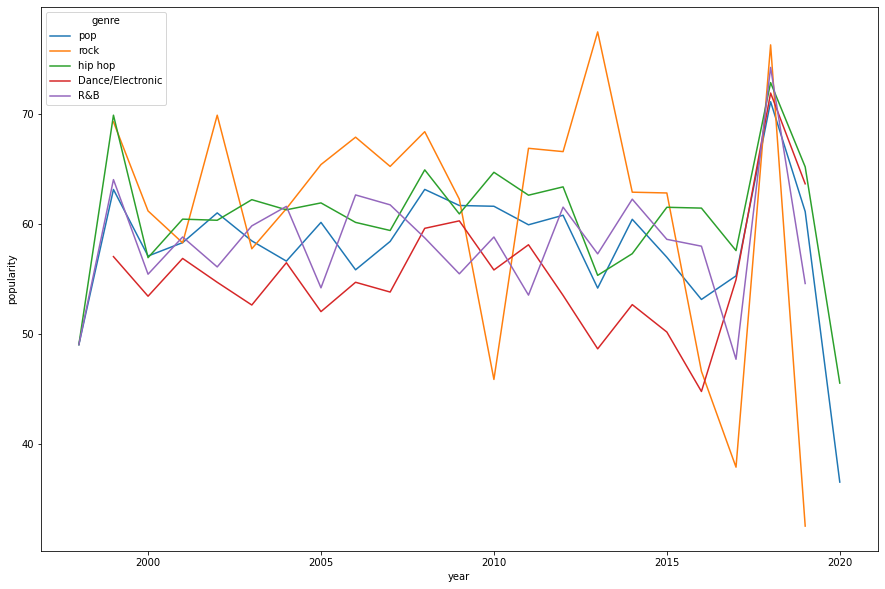

In [10]:
# Passo 8: fazendo o recorte
# Criando uma máscara
split_genres_mask = united_df["genre"].isin(united_df['genre'].value_counts().index[united_df['genre'].value_counts() > 100])

# Aplicando a máscara
split_genres_df = united_df[split_genres_mask]

# Passo 9: plotando os dados
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='year', y='popularity', data=split_genres_df, hue='genre', ci=None)

Chegamos em um gráfico interessante. A maior parte dos gêneros com um maior número de ocorrências manteve uma constância, com poucas exceções. A exceção mais notável se dá entre 2015 e 2020, com uma subida e uma queda abrupta de todos os gêneros.

Notável também a variação do rock, que em 2010 esteve com a sua menor popularidade, e em 2013 atingiu o seu pico, tendo uma quebra abrupta em seguida, seguindo a variação de todos os demais gêneros.

### Analisando o artista

In [167]:
# Capturando o artista com maior número de ocorrências
mask = data['artist'].value_counts()
data_to_artist = data[data["artist"].isin(mask.index[data['artist'].value_counts() > 10])]
data_to_artist["artist"].value_counts()

Rihanna              25
Drake                23
Eminem               21
Calvin Harris        20
Britney Spears       19
David Guetta         18
Chris Brown          17
Kanye West           17
Taylor Swift         16
Beyoncé              16
Katy Perry           16
P!nk                 15
Ariana Grande        14
Black Eyed Peas      14
Maroon 5             13
Coldplay             13
Jason Derulo         13
Justin Timberlake    12
JAY-Z                12
Bruno Mars           12
Nelly                11
Flo Rida             11
Lady Gaga            11
Usher                11
Name: artist, dtype: int64

### Hipótese: o artista com maior número de músicas (ocorrências) é o artista que tem as músicas com maior popularidade

<AxesSubplot:ylabel='artist'>

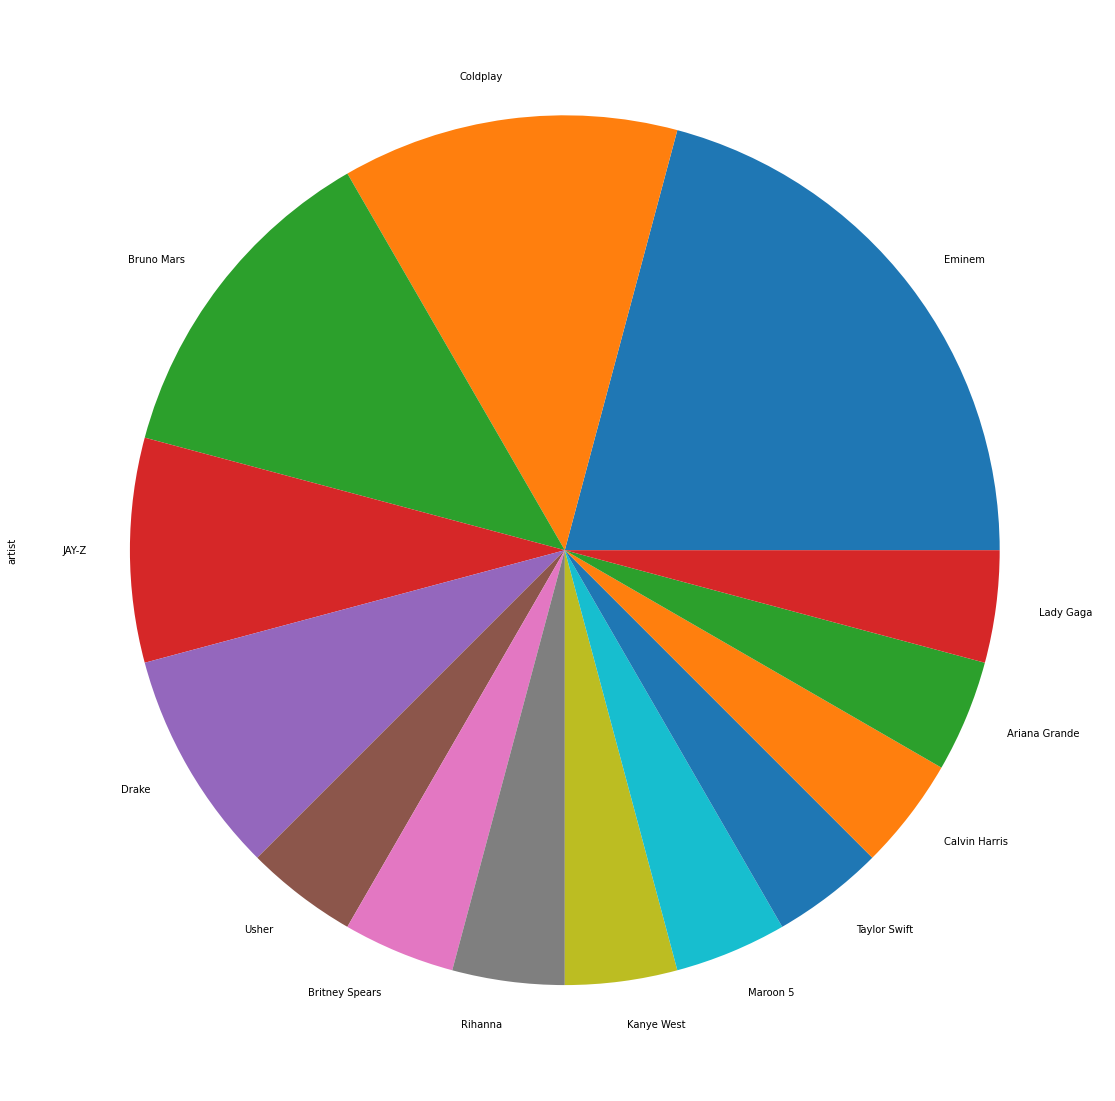

In [166]:
# Gerando gráfico com artistas com músicas com maior popularidade 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30,20))
mask = data_to_artist['popularity']
data_to_artist_popularity = data_to_artist[mask > 80]
data_to_artist_popularity.artist.value_counts().plot.pie()

Visualisando no gráfico podemos perceber que a hipótese não se validou, apesar de esperarmos uma ocorrência maior das música da cantora "Rihanna" com alta popularidade podemos encontrá-la com músicas mais populares.
O terceiro artista com mais incidências possui mais músicas com alta popularidade dentro do ponto de corte de "80".

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
data =  pd.read_csv("songs_normalize.csv")
data

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [24]:
data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [25]:
data.dtypes

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

In [26]:
data.corr()

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.123595,-0.316534,0.050617,-0.060057,-0.078763,-0.002560,-0.079912,-0.003848,0.066998,0.010923,-0.004208,0.024941,-0.116870,-0.028603
explicit,0.123595,1.000000,0.078477,0.046605,0.248845,-0.162462,0.003320,-0.089829,0.049576,0.417343,-0.033523,-0.082522,0.008884,-0.045455,0.013221
year,-0.316534,0.078477,1.000000,-0.003825,0.033532,-0.108644,0.007380,0.017479,-0.007358,0.001111,0.033809,-0.050265,-0.027037,-0.209365,0.076867
popularity,0.050617,0.046605,-0.003825,1.000000,-0.003546,-0.014021,0.014823,0.030632,-0.021353,0.021162,0.024619,-0.048059,-0.009856,-0.016142,0.014288
danceability,-0.060057,0.248845,0.033532,-0.003546,1.000000,-0.104038,0.032731,-0.033315,-0.067528,0.145590,-0.065429,0.023207,-0.126413,0.403178,-0.173418
energy,-0.078763,-0.162462,-0.108644,-0.014021,-0.104038,1.000000,-0.003446,0.651016,-0.040651,-0.057018,-0.445469,0.037861,0.156761,0.334474,0.153719
key,-0.002560,0.003320,0.007380,0.014823,0.032731,-0.003446,1.000000,-0.007474,-0.153182,0.007147,0.002365,-0.008173,-0.033071,0.036977,-0.001431
loudness,-0.079912,-0.089829,0.017479,0.030632,-0.033315,0.651016,-0.007474,1.000000,-0.028133,-0.076388,-0.310039,-0.104925,0.102159,0.232150,0.080709
mode,-0.003848,0.049576,-0.007358,-0.021353,-0.067528,-0.040651,-0.153182,-0.028133,1.000000,-0.000077,0.005744,-0.038613,0.025439,-0.074681,0.048434
speechiness,0.066998,0.417343,0.001111,0.021162,0.145590,-0.057018,0.007147,-0.076388,-0.000077,1.000000,0.000394,-0.062954,0.061172,0.073605,0.057747


In [27]:
data.nunique()

artist               835
song                1879
duration_ms         1793
explicit               2
year                  23
popularity            76
danceability         565
energy               580
key                   12
loudness            1671
mode                   2
speechiness          837
acousticness        1208
instrumentalness     772
liveness             783
valence              760
tempo               1831
genre                 59
dtype: int64

__VALIDANDO A PRIMEIRA HIPÓTESE: As músicas foram se tornando mais explícitas ao longo dos anos?__

In [28]:
data['explicit'].value_counts(normalize=True)

False    0.7245
True     0.2755
Name: explicit, dtype: float64

In [40]:
data['explicit'].mean()

0.2755

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [70]:
explicit_mean = data.groupby(['year'])['explicit'].agg(["mean", "std", "count"])

explicit_mean

,mean,std,count
year,,,
1998,1.000000,NaN,1
1999,0.210526,0.413155,38
2000,0.162162,0.371116,74
2001,0.212963,0.411310,108
2002,0.333333,0.474045,90
2003,0.237113,0.427522,97
2004,0.375000,0.486664,96
2005,0.278846,0.450603,104
2006,0.273684,0.448214,95


In [33]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [34]:
data[data.duplicated()]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
161,Craig David,Fill Me In,257200,False,2000,60,0.682,0.744,8,-6.981,1,0.0365,0.376000,0.009510,0.0600,0.827,132.493,"hip hop, pop, R&B"
179,Destiny's Child,"Independent Women, Pt. 1",221133,False,2001,65,0.730,0.602,6,-3.782,0,0.2060,0.362000,0.000004,0.1690,0.927,97.954,"pop, R&B"
187,Gabrielle,Rise,219093,False,2001,60,0.558,0.481,8,-9.487,1,0.0260,0.315000,0.000009,0.0900,0.631,144.673,"pop, R&B"
215,Linkin Park,In the End,216880,False,2000,83,0.556,0.864,3,-5.870,0,0.0584,0.009580,0.000000,0.2090,0.400,105.143,"rock, metal"
236,Kylie Minogue,Spinning Around,207866,False,2000,55,0.761,0.662,6,-7.645,0,0.0548,0.292000,0.000062,0.0956,0.631,120.043,"pop, Dance/Electronic"
310,Busta Rhymes,I Know What You Want (feat. Flipmode Squad),324306,True,2002,68,0.648,0.759,6,-4.315,1,0.3060,0.014200,0.000000,0.6480,0.518,85.996,"hip hop, pop"
374,Coldplay,Clocks,307879,False,2002,79,0.577,0.749,5,-7.215,0,0.0279,0.599000,0.011500,0.1830,0.255,130.970,"rock, pop"
376,Missy Elliott,Work It,263226,True,2002,70,0.884,0.677,1,-5.603,1,0.2830,0.077800,0.000000,0.0732,0.584,101.868,"hip hop, pop, R&B"
394,Daniel Bedingfield,If You're Not The One,257026,False,2002,58,0.688,0.538,10,-7.608,1,0.0292,0.504000,0.000000,0.1110,0.270,119.998,pop
431,Baby Bash,Suga Suga,239026,False,2003,73,0.662,0.748,5,-3.041,0,0.2680,0.688000,0.000008,0.0841,0.535,82.331,"hip hop, pop, R&B, latin"


In [68]:
## Limpando os dados duplicados
data.drop_duplicates(keep='first')
## df_dup.drop_duplicates(inplace=True)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,explicit_mean
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,NaN
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",NaN
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",NaN
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",NaN
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,NaN
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,NaN
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country",NaN
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,1.000000


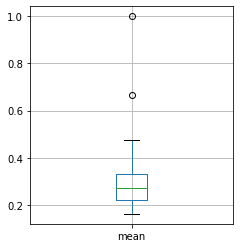

In [79]:
plt.figure(figsize=(8,4))
plt.subplot(121); explicit_mean.boxplot(['mean'])
plt.show()

In [ ]:
def remove_outliers_IQR(df, attributes, factor):
    '''
    funcao para remover outliers com base no IQR
    parametros:
        - df : dataframe
        - attributes : lista de atributos que saem
        - factor : fator do IQR que vamos somar / subtrair
    '''
    df_copy = df.copy()
    for var in attributes:
        ## verificar se a variável é numérica
        if np.issubdtype(df[var].dtype, np.number): ## Me retorna verdade se é float ou int
            Q1 = df_copy[var].quantile(0.25)
            Q3 = df_copy[var].quantile(0.75)
            IQR = Q3 - Q1
            
            inliers_mask = (df_copy[var] >= Q1 - (IQR * factor)) & (df_copy[var] <= Q3 + (IQR * factor))
            df_copy = df_copy[inliers_mask]
            
    return df_copy

In [83]:
explicit_mean_clean = remove_outliers_IQR(explicit_mean, ['mean'], 1.5)

explicit_mean_clean

,mean,std,count
year,,,
1999,0.210526,0.413155,38
2000,0.162162,0.371116,74
2001,0.212963,0.411310,108
2002,0.333333,0.474045,90
2003,0.237113,0.427522,97
2004,0.375000,0.486664,96
2005,0.278846,0.450603,104
2006,0.273684,0.448214,95
2007,0.234043,0.425669,94


In [92]:
total_mean_clean = explicit_mean_clean.mean()
total_mean_clean


mean      0.272389
std       0.439100
count    95.047619
dtype: float64

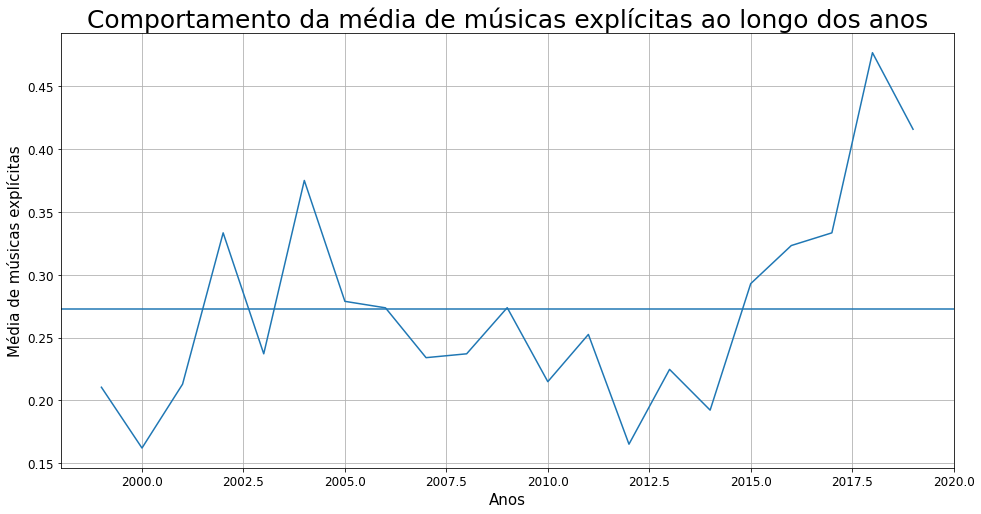

In [94]:
##SEABORN

# Ajustando o tamanho da Figura
plt.figure(figsize = (16, 8)) ## Tamanho da figura em polegadas

# Gráfico de dispersão
graph = sns.lineplot(data = explicit_mean_clean, x='year' ,y= 'mean')

graph.axhline(0.272389)

# Coloca o titulo
plt.title('Comportamento da média de músicas explícitas ao longo dos anos', fontsize = 25)

# Titulo para eixo X
plt.xlabel('Anos', fontsize=15)

# Titulo para eixo Y
plt.ylabel('Média de músicas explícitas', fontsize=15)

# Tamanho da fonte da grade X
plt.xticks(fontsize = 12)

# Tamanho da fonte da grade Y
plt.yticks(fontsize = 12)

# Colocando Grid no Gráfico
plt.grid()

# Mostra o nosso Gráfico
plt.show()